In [85]:
import pandas as pd
import os
import re
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

def get_loss_files(file_location,pattern):
    lhs_batch_work_dir=file_location
    filenames=os.listdir(lhs_batch_work_dir)
    lhs_lpi_batch=pd.DataFrame()
    actual_run_name=[]#the way files are saved now gives us 0-10, but we want to have the actual index+ run
    for i in filenames:
        if len(re.findall(pattern,i))!=0:
            run=re.search("run\d",i).group()
            parameter_ind=int(re.search("\d*.csv",i).group()[:-4])
            

            data=pd.read_csv(lhs_batch_work_dir+i,index_col=0)
            nrows,ncols=np.shape(data)
            index=[j+parameter_ind for j in range(ncols)]
            index=[run+"_"+str(k) for k in index]
            data.columns=index
            lhs_lpi_batch=pd.concat([lhs_lpi_batch,data],axis=1)
    return lhs_lpi_batch


def format_data(experiment):
    #seeks runs where the training process failed
    # and removes NA values
    n_experiment=np.shape(experiment)[1]
    experiment.columns=np.arange(n_experiment)
    failed=np.where(experiment==-1)[1]
    failed=[str(i) for i in failed]

    exclude=np.setdiff1d(experiment.columns.to_list(),failed)
    experiment=experiment.filter(items=list(exclude),axis=1)

    experiment.fillna(0,inplace=True)
    n_experiment=np.shape(experiment)[1]
    # print(n_experiment)
    return n_experiment,experiment


def myplot(score,coeff,labels,title,var_explained):
    xs = score[:,0]
    ys = score[:,1]
    n = coeff.shape[0]
    scalex = 1.0/(xs.max() - xs.min())
    scaley = 1.0/(ys.max() - ys.min())
    plt.scatter(xs * scalex,ys * scaley)
    for i in range(n):
        plt.arrow(0, 0, coeff[i,0], coeff[i,1],color = 'r',alpha = 0.5)
        if labels is None:
            plt.text(coeff[i,0]* 1.15, coeff[i,1]*1.15 , "Var"+str(i+1), color = 'black', ha = 'center', va = 'center')
        else:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, labels[i], color = 'black', ha = 'center', va = 'center')
    plt.xlim(-1,1)
    plt.title(title)
    plt.annotate("Var explained: "+str(np.round(var_explained,3)*100),xy=(0.4,0.75))
    plt.ylim(-1,1)
    plt.xlabel("PC{}".format(1))
    plt.ylabel("PC{}".format(2))
    plt.grid()


### Batch


(462, 500)
(560, 500)
(451, 500)


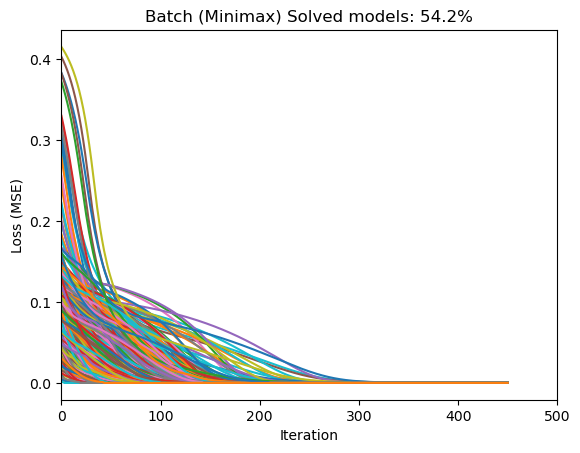

In [86]:
#lhs
lhs_lpi_batch=get_loss_files(file_location="../results/batch/lhs/",pattern="batch_run\d_loss_per")
print(np.shape(lhs_lpi_batch))
nrows_batch,ncols_batch=np.shape(lhs_lpi_batch)
failed_batch=np.where(lhs_lpi_batch==-1)[1]
n_lhs_lpi_batch,lhs_lpi_batch=format_data(lhs_lpi_batch)

# fig,ax=plt.subplots()
# for i in range(np.shape(lhs_lpi_batch)[1]):
#     ax.plot(lhs_lpi_batch.iloc[:,i])#$, color=plt.cm.Reds(i))

batch_lhs_succes=np.sum(lhs_lpi_batch.iloc[nrows_batch-1:,:]==0)#/np.shape(uniform_lpi_batch))[1]
batch_lhs_succes=np.round(np.sum(list(batch_lhs_succes))/ncols_batch*100,2)
# annotation="Solved models: "+str(batch_lhs_succes)+ "%"
# plt.title("batch (LHS) "+ str(ncols_batch)+" initializations")
# plt.xlabel("Iteration")
# plt.xlim(0,500)
# plt.ylabel("Loss (MSE)")
# plt.show()

lhs_lpi_batch=get_loss_files(file_location="../results/batch/uniform/",pattern="batch_run\d_loss_per")
print(np.shape(lhs_lpi_batch))
nrows_batch,ncols_batch=np.shape(lhs_lpi_batch)
failed_batch=np.where(lhs_lpi_batch==-1)[1]
n_lhs_lpi_batch,lhs_lpi_batch=format_data(lhs_lpi_batch)


# fig,ax=plt.subplots()
# for i in range(np.shape(lhs_lpi_batch)[1]):
#     ax.plot(lhs_lpi_batch.iloc[:,i])#$, color=plt.cm.Reds(i))

batch_uni_succes=np.sum(lhs_lpi_batch.iloc[nrows_batch-1:,:]==0)#/np.shape(uniform_lpi_batch))[1]
batch_uni_succes=np.round(np.sum(list(batch_uni_succes))/ncols_batch*100,2)
# annotation="Solved models: "+str(batch_uni_succes)+ "%"
# plt.title("batch (Uniform) "+ str(ncols_batch)+" initializations")
# plt.xlabel("Iteration")
# plt.xlim(0,500)
# plt.ylabel("Loss (MSE)")
# plt.show()


lhs_lpi_batch=get_loss_files(file_location="../results/batch/minimax/",pattern="batch_run\d_loss_per")


print(np.shape(lhs_lpi_batch))
nrows_batch,ncols_batch=np.shape(lhs_lpi_batch)
failed_batch=np.where(lhs_lpi_batch==-1)[1]
n_lhs_lpi_batch,lhs_lpi_batch=format_data(lhs_lpi_batch)


fig,ax=plt.subplots()
for i in range(np.shape(lhs_lpi_batch)[1]):
    ax.plot(lhs_lpi_batch.iloc[:,i])#$, color=plt.cm.Reds(i))

batch_minimax_succes=np.sum(lhs_lpi_batch.iloc[nrows_batch-1:,:]==0)#/np.shape(uniform_lpi_batch))[1]
batch_minimax_succes=np.round(np.sum(list(batch_minimax_succes))/ncols_batch*100,2)
annotation="Solved models: "+str(batch_minimax_succes)+ "%"
plt.title("Batch (Minimax) "+annotation)
plt.xlabel("Iteration")
plt.xlim(0,500)
plt.ylabel("Loss (MSE)")
plt.show()

succes_rate_batch=[batch_uni_succes,batch_lhs_succes,batch_minimax_succes]

In [87]:
failed_batch

array([154,  91, 183, 443, 116, 218, 173, 206, 238, 369, 321, 356,   5,
       285,  42, 413,  83, 252, 492, 431, 216, 440,  40, 232, 366, 128,
       346, 490, 176, 482, 256, 332, 379, 389, 442,  62, 262, 313, 461,
        37, 251, 481, 198, 239, 306, 259, 310,  14,  55, 261, 438, 494,
       147, 278, 284, 348, 407, 460,   3,  56, 224, 408, 486, 140, 231,
       247, 324,  54, 244, 297, 455,  11, 227, 270, 152,  70, 304, 463,
       184, 208,   9, 186, 364, 426,  50, 405,  34, 114, 242, 351,   8,
       143, 119, 283, 454,  67, 210, 473, 134, 268, 447, 250, 399, 108,
       192, 219, 403,  20,  38,  57,  82, 131, 372, 157, 241,  32, 342,
       111, 204, 301, 375, 105, 150, 248, 469, 498,  63,  78, 269, 273,
       319, 444, 117, 245, 299,  94, 182, 325, 368, 189, 201, 236, 480,
       483,  89, 272,  18,  59, 258, 295, 300, 401,  69,  77, 106, 456,
       495, 181, 398, 345, 432, 472, 477, 257, 275, 132, 207, 296, 393,
        84, 130, 163, 387, 474, 170, 307,  15,  76, 171,   6,   

### BIOMD0000000458 model
--> LHS
--> Uniform
--> Maxmin

(3000, 50)
(3000, 500)
(2997, 400)


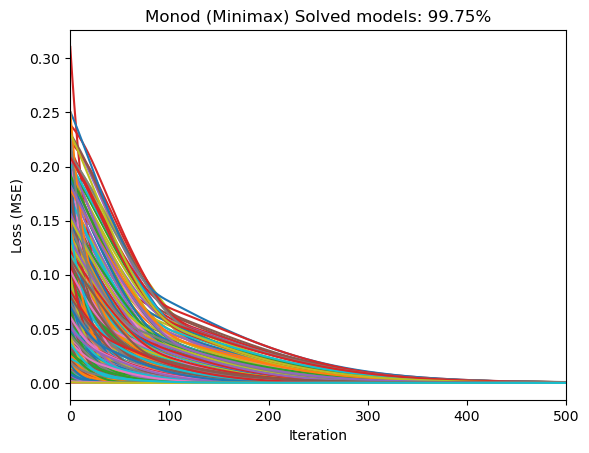

In [88]:
#lhs
lhs_lpi_monod=get_loss_files(file_location="../results/monod/lhs/",pattern="monod_run\d_loss_per")
print(np.shape(lhs_lpi_BIOMD0000000458))
nrows_BIOMD0000000458,ncols_BIOMD0000000458=np.shape(lhs_lpi_BIOMD0000000458)
failed_BIOMD0000000458=np.where(lhs_lpi_monod==-1)[1]
n_lhs_lpi_monod,lhs_lpi_monod=format_data(lhs_lpi_monod)

# fig,ax=plt.subplots()
# for i in range(np.shape(lhs_lpi_monod)[1]):
#     ax.plot(lhs_lpi_monod.iloc[:,i])#$, color=plt.cm.Reds(i))

monod_lhs_succes=np.sum(lhs_lpi_monod.iloc[nrows_monod-1:,:]==0)#/np.shape(uniform_lpi_monod))[1]
monod_lhs_succes=np.round(np.sum(list(monod_lhs_succes))/ncols_monod*100,2)
# annotation="Solved models: "+str(monod_lhs_succes)+ "%"
# plt.title("Monod (LHS) "+ str(ncols_monod)+" initializations")
# plt.xlabel("Iteration")
# plt.xlim(0,500)
# plt.ylabel("Loss (MSE)")
# plt.show()

lhs_lpi_monod=get_loss_files(file_location="../results/monod/uniform/",pattern="monod_uni_run\d_loss_per")
print(np.shape(lhs_lpi_monod))
nrows_monod,ncols_monod=np.shape(lhs_lpi_monod)
failed_monod=np.where(lhs_lpi_monod==-1)[1]
n_lhs_lpi_monod,lhs_lpi_monod=format_data(lhs_lpi_monod)


# fig,ax=plt.subplots()
# for i in range(np.shape(lhs_lpi_monod)[1]):
#     ax.plot(lhs_lpi_monod.iloc[:,i])#$, color=plt.cm.Reds(i))

monod_uni_succes=np.sum(lhs_lpi_monod.iloc[nrows_monod-1:,:]==0)#/np.shape(uniform_lpi_monod))[1]
monod_uni_succes=np.round(np.sum(list(monod_uni_succes))/ncols_monod*100,2)
# annotation="Solved models: "+str(monod_uni_succes)+ "%"
# plt.title("Monod (Uniform) "+ str(ncols_monod)+" initializations")
# plt.xlabel("Iteration")
# plt.xlim(0,500)
# plt.ylabel("Loss (MSE)")
# plt.show()


lhs_lpi_monod=get_loss_files(file_location="../results/monod/minimax/",pattern="monod_run\d_loss_per")
lhs_lpi_monod_2=get_loss_files(file_location="../results/monod/minimax/",pattern="monod_uni_run\d_loss_per")
lhs_lpi_monod=pd.concat([lhs_lpi_monod,lhs_lpi_monod_2],axis=1)

print(np.shape(lhs_lpi_monod))
nrows_monod,ncols_monod=np.shape(lhs_lpi_monod)
failed_monod=np.where(lhs_lpi_monod==-1)[1]
n_lhs_lpi_monod,lhs_lpi_monod=format_data(lhs_lpi_monod)


fig,ax=plt.subplots()
for i in range(np.shape(lhs_lpi_monod)[1]):
    ax.plot(lhs_lpi_monod.iloc[:,i])#$, color=plt.cm.Reds(i))

monod_minimax_succes=np.sum(lhs_lpi_monod.iloc[nrows_monod-1:,:]==0)#/np.shape(uniform_lpi_monod))[1]
monod_minimax_succes=np.round(np.sum(list(monod_minimax_succes))/ncols_monod*100,2)
annotation="Solved models: "+str(monod_minimax_succes)+ "%"
plt.title("Monod (Minimax) "+annotation)
plt.xlabel("Iteration")
plt.xlim(0,500)
plt.ylabel("Loss (MSE)")
plt.show()


succes_rate_monod=[monod_uni_succes,monod_lhs_succes,monod_minimax_succes]

(3000, 270)


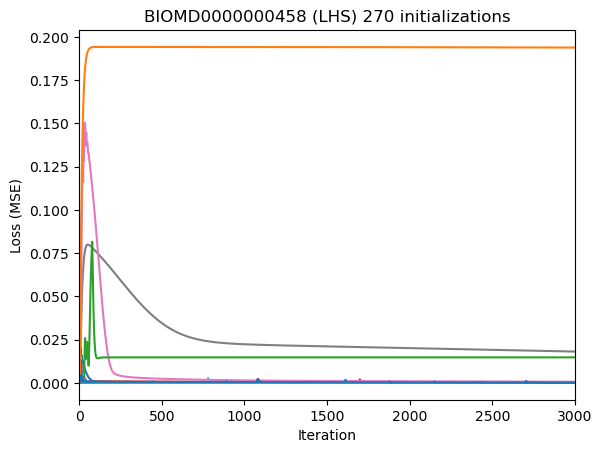

(3000, 275)


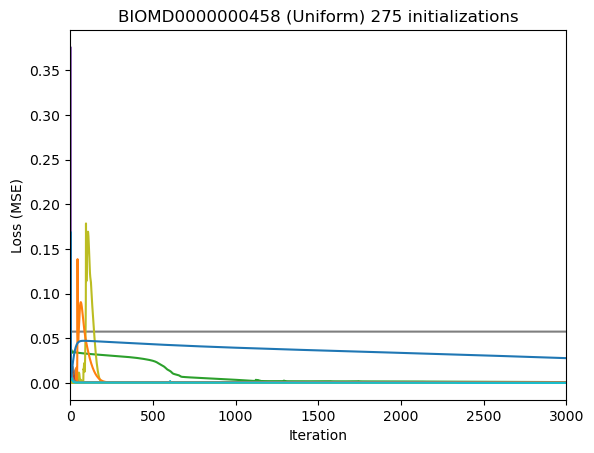

(3000, 215)


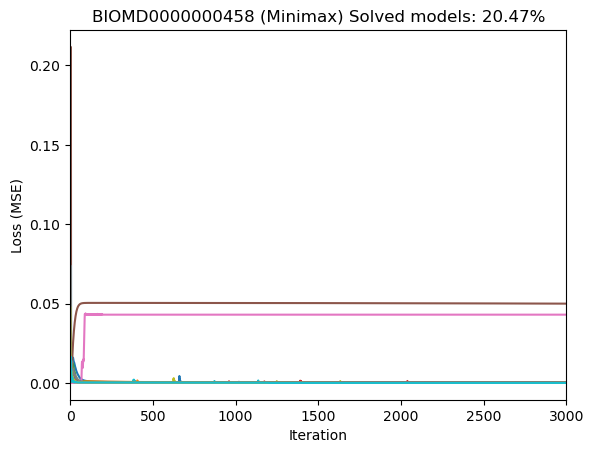

In [95]:
lhs_lpi_BIOMD0000000458=get_loss_files(file_location="../results/BIOMD0000000458/lhs/",pattern="BIOMD0000000458_run\d_loss_per")
print(np.shape(lhs_lpi_BIOMD0000000458))
nrows_BIOMD0000000458,ncols_BIOMD0000000458=np.shape(lhs_lpi_BIOMD0000000458)
failed_BIOMD0000000458=np.where(lhs_lpi_BIOMD0000000458==-1)[1]
n_lhs_lpi_BIOMD0000000458,lhs_lpi_BIOMD0000000458=format_data(lhs_lpi_BIOMD0000000458)

fig,ax=plt.subplots()
for i in range(np.shape(lhs_lpi_BIOMD0000000458)[1]):
    ax.plot(lhs_lpi_BIOMD0000000458.iloc[:,i])#$, color=plt.cm.Reds(i))

BIOMD0000000458_lhs_succes=np.sum(lhs_lpi_BIOMD0000000458.iloc[nrows_BIOMD0000000458-1:,:]==0)#/np.shape(uniform_lpi_BIOMD0000000458))[1]
BIOMD0000000458_lhs_succes=np.round(np.sum(list(BIOMD0000000458_lhs_succes))/ncols_BIOMD0000000458*100,2)
annotation="Solved models: "+str(BIOMD0000000458_lhs_succes)+ "%"
plt.title("BIOMD0000000458 (LHS) "+ str(ncols_BIOMD0000000458)+" initializations")
plt.xlabel("Iteration")
plt.xlim(0,3000)
plt.ylabel("Loss (MSE)")
plt.show()


lhs_lpi_BIOMD0000000458=get_loss_files(file_location="../results/BIOMD0000000458/uniform/",pattern="BIOMD0000000458_run\d_loss_per")
print(np.shape(lhs_lpi_BIOMD0000000458))
nrows_BIOMD0000000458,ncols_BIOMD0000000458=np.shape(lhs_lpi_BIOMD0000000458)
failed_BIOMD0000000458=np.where(lhs_lpi_BIOMD0000000458==-1)[1]
n_lhs_lpi_BIOMD0000000458,lhs_lpi_BIOMD0000000458=format_data(lhs_lpi_BIOMD0000000458)

fig,ax=plt.subplots()
for i in range(np.shape(lhs_lpi_BIOMD0000000458)[1]):
    ax.plot(lhs_lpi_BIOMD0000000458.iloc[:,i])#$, color=plt.cm.Reds(i))

BIOMD0000000458_uni_succes=np.sum(lhs_lpi_BIOMD0000000458.iloc[nrows_BIOMD0000000458-1:,:]==0)#/np.shape(uniform_lpi_BIOMD0000000458))[1]
BIOMD0000000458_uni_succes=np.round(np.sum(list(BIOMD0000000458_uni_succes))/ncols_BIOMD0000000458*100,2)
annotation="Solved models: "+str(BIOMD0000000458_uni_succes)+ "%"
plt.title("BIOMD0000000458 (Uniform) "+ str(ncols_BIOMD0000000458)+" initializations")
plt.xlabel("Iteration")
plt.xlim(0,3000)
plt.ylabel("Loss (MSE)")
plt.show()


lhs_lpi_BIOMD0000000458=get_loss_files(file_location="../results/BIOMD0000000458/minimax/",pattern="BIOMD0000000458_run\d_loss_per")


print(np.shape(lhs_lpi_BIOMD0000000458))
nrows_BIOMD0000000458,ncols_BIOMD0000000458=np.shape(lhs_lpi_BIOMD0000000458)
failed_BIOMD0000000458=np.where(lhs_lpi_BIOMD0000000458==-1)[1]
n_lhs_lpi_BIOMD0000000458,lhs_lpi_BIOMD0000000458=format_data(lhs_lpi_BIOMD0000000458)


fig,ax=plt.subplots()
for i in range(np.shape(lhs_lpi_BIOMD0000000458)[1]):
    ax.plot(lhs_lpi_BIOMD0000000458.iloc[:,i])#$, color=plt.cm.Reds(i))

BIOMD0000000458_minimax_succes=np.sum(lhs_lpi_BIOMD0000000458.iloc[nrows_BIOMD0000000458-1:,:]==0)#/np.shape(uniform_lpi_BIOMD0000000458))[1]
BIOMD0000000458_minimax_succes=np.round(np.sum(list(BIOMD0000000458_minimax_succes))/ncols_BIOMD0000000458*100,2)
annotation="Solved models: "+str(BIOMD0000000458_minimax_succes)+ "%"
plt.title("BIOMD0000000458 (Minimax) "+annotation)
plt.xlabel("Iteration")
plt.xlim(0,3000)
plt.ylabel("Loss (MSE)")
plt.show()

succes_rate_BIOMD0000000458=[BIOMD0000000458_uni_succes,BIOMD0000000458_lhs_succes,BIOMD0000000458_minimax_succes]

(3000, 300)


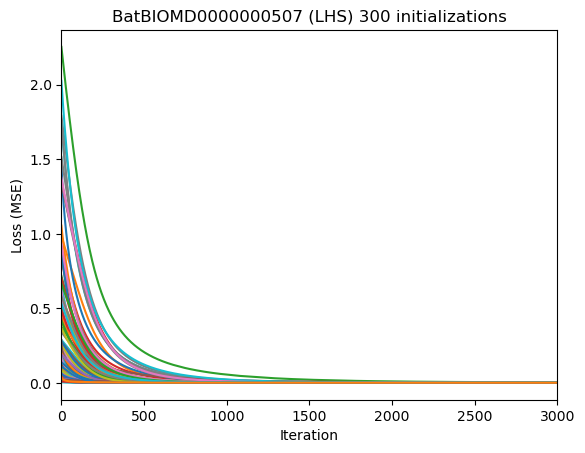

(3000, 300)


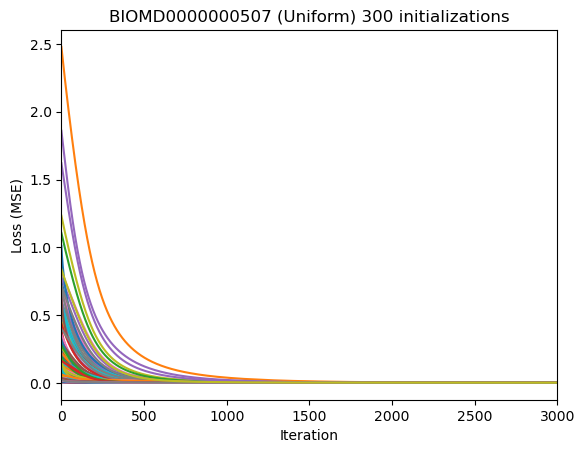

(3000, 300)
(157,)


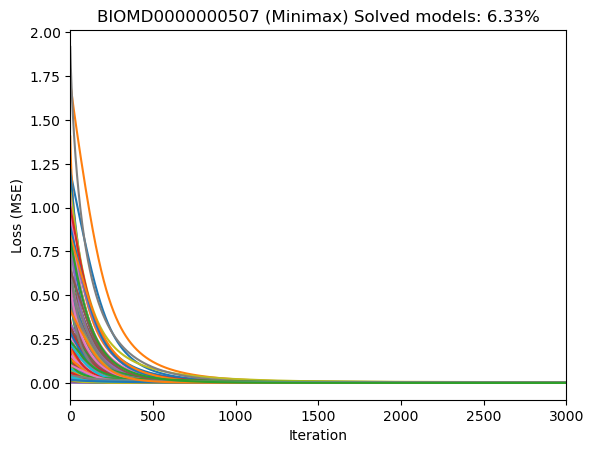

In [96]:
lhs_lpi_BIOMD0000000507=get_loss_files(file_location="../results/BIOMD0000000507/lhs/",pattern="BIOMD0000000507_run\d_loss_per")
print(np.shape(lhs_lpi_BIOMD0000000507))
nrows_BIOMD0000000507,ncols_BIOMD0000000507=np.shape(lhs_lpi_BIOMD0000000507)
failed_BIOMD0000000507=np.where(lhs_lpi_BIOMD0000000507==-1)[1]
n_lhs_lpi_BIOMD0000000507,lhs_lpi_BIOMD0000000507=format_data(lhs_lpi_BIOMD0000000507)

fig,ax=plt.subplots()
for i in range(np.shape(lhs_lpi_BIOMD0000000507)[1]):
    ax.plot(lhs_lpi_BIOMD0000000507.iloc[:,i])#$, color=plt.cm.Reds(i))

BIOMD0000000507_lhs_succes=np.sum(lhs_lpi_BIOMD0000000507.iloc[nrows_BIOMD0000000507-1:,:]==0)#/np.shape(uniform_lpi_BIOMD0000000507))[1]
BIOMD0000000507_lhs_succes=np.round(np.sum(list(BIOMD0000000507_lhs_succes))/ncols_BIOMD0000000507*100,2)
annotation="Solved models: "+str(BIOMD0000000507_lhs_succes)+ "%"
plt.title("BatBIOMD0000000507 (LHS) "+ str(ncols_BIOMD0000000507)+" initializations")
plt.xlabel("Iteration")
plt.xlim(0,3000)
plt.ylabel("Loss (MSE)")
plt.show()


lhs_lpi_BIOMD0000000507=get_loss_files(file_location="../results/BIOMD0000000507/uniform/",pattern="BIOMD0000000507_run\d_loss_per")
print(np.shape(lhs_lpi_BIOMD0000000507))
nrows_BIOMD0000000507,ncols_BIOMD0000000507=np.shape(lhs_lpi_BIOMD0000000507)
failed_BIOMD0000000507=np.where(lhs_lpi_BIOMD0000000507==-1)[1]
n_lhs_lpi_BIOMD0000000507,lhs_lpi_BIOMD0000000507=format_data(lhs_lpi_BIOMD0000000507)

fig,ax=plt.subplots()
for i in range(np.shape(lhs_lpi_BIOMD0000000507)[1]):
    ax.plot(lhs_lpi_BIOMD0000000507.iloc[:,i])#$, color=plt.cm.Reds(i))

BIOMD0000000507_uni_succes=np.sum(lhs_lpi_BIOMD0000000507.iloc[nrows_BIOMD0000000507-1:,:]==0)#/np.shape(uniform_lpi_BIOMD0000000507))[1]
BIOMD0000000507_uni_succes=np.round(np.sum(list(BIOMD0000000507_uni_succes))/ncols_BIOMD0000000507*100,2)
annotation="Solved models: "+str(BIOMD0000000507_uni_succes)+ "%"
plt.title("BIOMD0000000507 (Uniform) "+ str(ncols_BIOMD0000000507)+" initializations")
plt.xlabel("Iteration")
plt.xlim(0,3000)
plt.ylabel("Loss (MSE)")
plt.show()


lhs_lpi_BIOMD0000000507=get_loss_files(file_location="../results/BIOMD0000000507/minimax/",pattern="BIOMD0000000507_run\d_loss_per")


print(np.shape(lhs_lpi_BIOMD0000000507))
nrows_BIOMD0000000507,ncols_BIOMD0000000507=np.shape(lhs_lpi_BIOMD0000000507)
failed_BIOMD0000000507=np.where(lhs_lpi_BIOMD0000000507==-1)[1]
print(np.shape(failed_BIOMD0000000507))
n_lhs_lpi_BIOMD0000000507,lhs_lpi_BIOMD0000000507=format_data(lhs_lpi_BIOMD0000000507)


fig,ax=plt.subplots()
for i in range(np.shape(lhs_lpi_BIOMD0000000507)[1]):
    ax.plot(lhs_lpi_BIOMD0000000507.iloc[:,i])#$, color=plt.cm.Reds(i))

BIOMD0000000507_minimax_succes=np.sum(lhs_lpi_BIOMD0000000507.iloc[nrows_BIOMD0000000507-1:,:]==0)#/np.shape(uniform_lpi_BIOMD0000000507))[1]
BIOMD0000000507_minimax_succes=np.round(np.sum(list(BIOMD0000000507_minimax_succes))/ncols_BIOMD0000000507*100,2)
annotation="Solved models: "+str(BIOMD0000000507_minimax_succes)+ "%"
plt.title("BIOMD0000000507 (Minimax) "+annotation)
plt.xlabel("Iteration")
plt.xlim(0,3000)
plt.ylabel("Loss (MSE)")
plt.show()

succes_rate_BIOMD0000000507=[BIOMD0000000507_uni_succes,BIOMD0000000507_lhs_succes,BIOMD0000000507_minimax_succes]

In [97]:
succes_rates=pd.DataFrame({"4 parameter model":succes_rate_batch,"7 parameter model":succes_rate_BIOMD0000000507,"9 parameter model":succes_rate_monod,"10 parameter model":succes_rate_BIOMD0000000458},
                          index=["uniform","lhs","maximin"])


succes_rates

,4 parameter model,7 parameter model,9 parameter model,10 parameter model
uniform,58.0,4.33,99.80,18.18
lhs,57.0,5.33,0.00,20.00
maximin,54.2,6.33,99.75,20.47


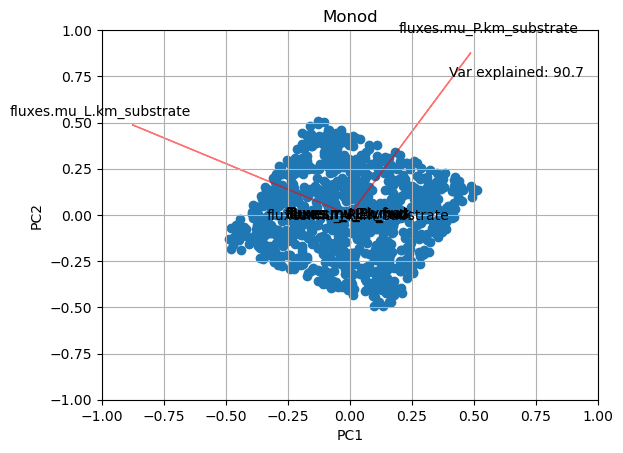

In [98]:
params_lpi_monod_lhs=get_loss_files(file_location="../results/monod/lhs/",pattern="monod_run\d_optim")
params_lpi_monod_uni=get_loss_files(file_location="../results/monod/uniform/",pattern="monod_run\d_optim")
params_lpi_monod_minmax=get_loss_files(file_location="../results/monod/minimax/",pattern="monod_run\d_optim")
params_lpi_monod=pd.concat([params_lpi_monod_lhs,params_lpi_monod_uni,params_lpi_monod_minmax],axis=1)
# print(np.shape(params_lpi_monod))

failed_monod=np.where(lhs_lpi_monod==-1)[1]
pca_monod=PCA(n_components=2)
x_monod=pca_monod.fit_transform(params_lpi_monod.T)

var_explained_monod=sum(pca_monod.explained_variance_ratio_)
myplot(score=x_monod[:,0:2],
       coeff=np.transpose(pca_monod.components_[0:2, :]),
       labels=list(params_lpi_monod.index),
       title="Monod",
       var_explained=var_explained_monod)
plt.show()



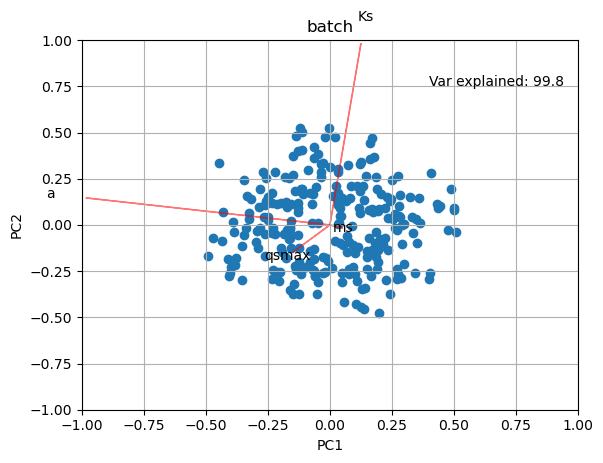

In [115]:
lhs_lpi_batch_lhs=get_loss_files(file_location="../results/batch/lhs/",pattern="batch_run\d_loss_per")
lhs_lpi_batch_uni=get_loss_files(file_location="../results/batch/uniform/",pattern="batch_run\d_loss_per")
lhs_lpi_batch_minmax=get_loss_files(file_location="../results/batch/minimax/",pattern="batch_run\d_loss_per")
lhs_lpi_batch=pd.concat([lhs_lpi_batch_lhs,lhs_lpi_batch_uni,lhs_lpi_batch_minmax],axis=1)
failed_batch=list(lhs_lpi_batch.iloc[:,np.where(lhs_lpi_batch==-1)[1]].columns)

params_lpi_batch_lhs=get_loss_files(file_location="../results/batch/lhs/",pattern="batch_run\d_optim")
params_lpi_batch_uni=get_loss_files(file_location="../results/batch/uniform/",pattern="batch_run\d_optim")
params_lpi_batch_minmax=get_loss_files(file_location="../results/batch/minimax/",pattern="batch_run\d_optim")
params_lpi_batch=pd.concat([params_lpi_batch_lhs,params_lpi_batch_uni,params_lpi_batch_minmax],axis=1)
params_lpi_batch=params_lpi_batch.drop(failed_batch,axis=1)


# print(np.shape(params_lpi_batch))


failed_batch=np.where(lhs_lpi_batch==-1)[1]
pca_batch=PCA(n_components=2)
x_batch=pca_batch.fit_transform(params_lpi_batch.T)

var_explained_batch=sum(pca_batch.explained_variance_ratio_)
myplot(score=x_batch[:,0:2],
       coeff=np.transpose(pca_batch.components_[0:2, :]),
       labels=list(params_lpi_batch.index),
       title="batch",
       var_explained=var_explained_batch)
plt.show()



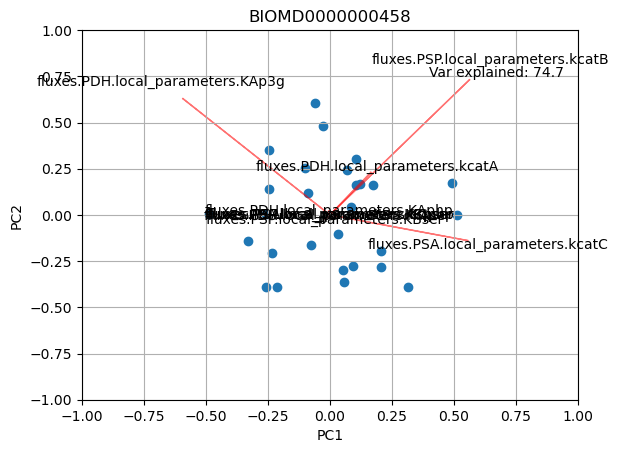

In [127]:
lhs_lpi_BIOMD0000000458_lhs=get_loss_files(file_location="../results/BIOMD0000000458/lhs/",pattern="BIOMD0000000458_run\d_loss_per")
lhs_lpi_BIOMD0000000458_uni=get_loss_files(file_location="../results/BIOMD0000000458/uniform/",pattern="BIOMD0000000458_run\d_loss_per")
lhs_lpi_BIOMD0000000458_minmax=get_loss_files(file_location="../results/BIOMD0000000458/minimax/",pattern="BIOMD0000000458_run\d_loss_per")
lhs_lpi_BIOMD0000000458=pd.concat([lhs_lpi_BIOMD0000000458_lhs,lhs_lpi_BIOMD0000000458_uni,lhs_lpi_BIOMD0000000458_minmax],axis=1)
failed_BIOMD0000000458=list(lhs_lpi_BIOMD0000000458.iloc[:,np.where(lhs_lpi_BIOMD0000000458==-1)[1]].columns)

params_lpi_BIOMD0000000458_lhs=get_loss_files(file_location="../results/BIOMD0000000458/lhs/",pattern="BIOMD0000000458_run\d_optim")
params_lpi_BIOMD0000000458_uni=get_loss_files(file_location="../results/BIOMD0000000458/uniform/",pattern="BIOMD0000000458_run\d_optim")
params_lpi_BIOMD0000000458_minmax=get_loss_files(file_location="../results/BIOMD0000000458/minimax/",pattern="BIOMD0000000458_run\d_optim")
params_lpi_BIOMD0000000458=pd.concat([params_lpi_BIOMD0000000458_lhs,params_lpi_BIOMD0000000458_uni,params_lpi_BIOMD0000000458_minmax],axis=1)
params_lpi_BIOMD0000000458=params_lpi_BIOMD0000000458.drop(failed_BIOMD0000000458,axis=1)

failed_BIOMD0000000458=np.where(lhs_lpi_BIOMD0000000458==-1)[1]
pca_BIOMD0000000458=PCA(n_components=2)
x_BIOMD0000000458=pca_BIOMD0000000458.fit_transform(params_lpi_BIOMD0000000458.T)

var_explained_BIOMD0000000458=sum(pca_BIOMD0000000458.explained_variance_ratio_)
myplot(score=x_BIOMD0000000458[:,0:2],
       coeff=np.transpose(pca_BIOMD0000000458.components_[0:2, :]),
       labels=list(params_lpi_BIOMD0000000458.index),
       title="BIOMD0000000458",
       var_explained=var_explained_BIOMD0000000458)
plt.show()

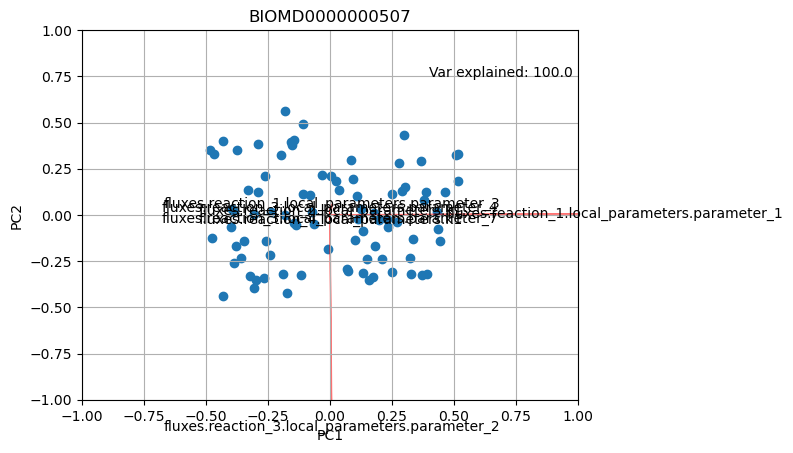

In [128]:
lhs_lpi_BIOMD0000000507_lhs=get_loss_files(file_location="../results/BIOMD0000000507/lhs/",pattern="BIOMD0000000507_run\d_loss_per")
lhs_lpi_BIOMD0000000507_uni=get_loss_files(file_location="../results/BIOMD0000000507/uniform/",pattern="BIOMD0000000507_run\d_loss_per")
lhs_lpi_BIOMD0000000507_minmax=get_loss_files(file_location="../results/BIOMD0000000507/minimax/",pattern="BIOMD0000000507_run\d_loss_per")
lhs_lpi_BIOMD0000000507=pd.concat([lhs_lpi_BIOMD0000000507_lhs,lhs_lpi_BIOMD0000000507_uni,lhs_lpi_BIOMD0000000507_minmax],axis=1)
failed_BIOMD0000000507=list(lhs_lpi_BIOMD0000000507.iloc[:,np.where(lhs_lpi_BIOMD0000000507==-1)[1]].columns)

params_lpi_BIOMD0000000507_lhs=get_loss_files(file_location="../results/BIOMD0000000507/lhs/",pattern="BIOMD0000000507_run\d_optim")
params_lpi_BIOMD0000000507_uni=get_loss_files(file_location="../results/BIOMD0000000507/uniform/",pattern="BIOMD0000000507_run\d_optim")
params_lpi_BIOMD0000000507_minmax=get_loss_files(file_location="../results/BIOMD0000000507/minimax/",pattern="BIOMD0000000507_run\d_optim")
params_lpi_BIOMD0000000507=pd.concat([params_lpi_BIOMD0000000507_lhs,params_lpi_BIOMD0000000507_uni,params_lpi_BIOMD0000000507_minmax],axis=1)
params_lpi_BIOMD0000000507=params_lpi_BIOMD0000000507.drop(failed_BIOMD0000000507,axis=1)

failed_BIOMD0000000507=np.where(lhs_lpi_BIOMD0000000507==-1)[1]
pca_BIOMD0000000507=PCA(n_components=2)
x_BIOMD0000000507=pca_BIOMD0000000507.fit_transform(params_lpi_BIOMD0000000507.T)

var_explained_BIOMD0000000507=sum(pca_BIOMD0000000507.explained_variance_ratio_)
myplot(score=x_BIOMD0000000507[:,0:2],
       coeff=np.transpose(pca_BIOMD0000000507.components_[0:2, :]),
       labels=list(params_lpi_BIOMD0000000507.index),
       title="BIOMD0000000507",
       var_explained=var_explained_BIOMD0000000507)
plt.show()

['run4_91',
 'run3_37',
 'run3_74',
 'run5_97',
 'run2_59',
 'run3_18',
 'run5_98',
 'run1_68',
 'run1_97',
 'run4_33',
 'run5_37',
 'run5_82',
 'run2_85',
 'run1_91',
 'run2_48',
 'run1_70',
 'run3_50',
 'run4_33',
 'run1_73',
 'run3_87',
 'run2_33',
 'run1_88',
 'run4_86',
 'run4_18',
 'run3_25',
 'run3_69',
 'run1_8',
 'run3_28',
 'run4_97',
 'run1_43',
 'run2_16',
 'run2_88',
 'run4_19',
 'run2_56',
 'run3_25',
 'run5_91',
 'run3_56',
 'run5_59',
 'run2_16',
 'run5_65',
 'run3_60',
 'run5_98',
 'run5_7',
 'run3_41',
 'run2_7',
 'run1_30',
 'run2_8',
 'run2_55',
 'run2_43',
 'run2_22',
 'run5_87',
 'run1_13',
 'run2_32',
 'run3_12',
 'run5_3',
 'run5_26',
 'run2_79',
 'run4_96',
 'run1_26',
 'run5_23',
 'run3_92',
 'run4_42',
 'run4_52',
 'run3_29',
 'run2_55',
 'run1_41',
 'run2_61',
 'run1_16',
 'run1_36',
 'run1_6',
 'run1_70',
 'run5_56',
 'run2_9',
 'run3_72',
 'run5_49',
 'run3_64',
 'run3_10',
 'run2_82',
 'run4_16',
 'run5_89',
 'run3_99',
 'run1_78',
 'run3_39',
 'run4_68',

In [94]:
params_lpi_batch_lhs=get_loss_files(file_location="../results/batch/lhs/",pattern="batch_run\d_optim")

params_lpi_batch_uni=get_loss_files(file_location="../results/batch/uniform/",pattern="batch_run\d_optim")
params_lpi_batch_minmax=get_loss_files(file_location="../results/batch/minimax/",pattern="batch_run\d_optim")
params_lpi_batch=pd.concat([params_lpi_batch_lhs,params_lpi_batch_uni,params_lpi_batch_minmax],axis=1)
# print(np.shape(params_lpi_monod))

failed_monod=np.where(lhs_batc==-1)[1]
pca_monod=PCA(n_components=2)
x_monod=pca_monod.fit_transform(params_lpi_monod.T)

var_explained_monod=sum(pca_monod.explained_variance_ratio_)
myplot(score=x_monod[:,0:2],
       coeff=np.transpose(pca_monod.components_[0:2, :]),
       labels=list(params_lpi_monod.index),
       title="Batch",
       var_explained=var_explained_monod)
plt.show()

NameError: name 'lhs_batc' is not defined